<a href="https://colab.research.google.com/github/Mark-Barbaric/IntermediateMachineLearning/blob/master/CMAR10_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

drive.mount('/content/drive')
pd.options.display.float_format = '{:,.2f}'.format

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Custom Methods

In [28]:
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending = False)
  percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
  ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  ms = ms[ms['Percent'] > 0]

  return ms

def pie_chart_from_value_counts(dataframe, column_name, chart_title):
  data = dataframe[column_name].value_counts()
  values = data.values
  names = data.index

  pie_chart = px.pie(dataframe,
                       values = values,
                       names = names, hole = 0.5,
                       title = chart_title)
  pie_chart.show()





# 1. **Import and Remove and Tidy Missing Data**

In [22]:
transaction_data = pd.read_csv('/content/drive/MyDrive/Intermediate Machine Learning/Week 2/bank_transactions.csv', thousands=',')
print(transaction_data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9,839.64  C1231006815     170,136.00      160,296.36   
1     1   PAYMENT  1,864.28  C1666544295      21,249.00       19,384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT 11,668.14  C2048537720      41,554.00       29,885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155            0.00            0.00        0  
1  M2044282225            0.00            0.00        0  
2   C553264065            0.00            0.00        1  
3    C38997010       21,182.00            0.00        1  
4  M1230701703            0.00            0.00        0  


In [23]:
transaction_data.columns = ['Step', 'Type', 'Amount', 'Source Name', 'Old Bal Source', 'New Bal Source', 'Dest Name', 'Old Bal Dest', 'New Bal Dest', 'Fraudulent']

In [24]:
transaction_data.isna().sum()

Step              0
Type              6
Amount            6
Source Name       0
Old Bal Source    0
New Bal Source    0
Dest Name         0
Old Bal Dest      0
New Bal Dest      0
Fraudulent        0
dtype: int64

In [25]:
transaction_data.dropna(subset=['Type', 'Amount'], inplace=True)
transaction_data

,Step,Type,Amount,Source Name,Old Bal Source,New Bal Source,Dest Name,Old Bal Dest,New Bal Dest,Fraudulent
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
99994,10,PAYMENT,62.19,C559473129,"215,097.09","215,034.89",M1361246816,0.00,0.00,1
99995,10,PAYMENT,"4,020.66",C1410794718,"159,929.00","155,908.34",M1257036576,0.00,0.00,0
99996,10,PAYMENT,"18,345.49",C744303677,"6,206.00",0.00,M1785344556,0.00,0.00,0
99997,10,CASH_IN,"183,774.91",C104331851,"39,173.00","222,947.91",C36392889,"54,925.05",0.00,0


In [26]:
transaction_data.isna().sum()

Step              0
Type              0
Amount            0
Source Name       0
Old Bal Source    0
New Bal Source    0
Dest Name         0
Old Bal Dest      0
New Bal Dest      0
Fraudulent        0
dtype: int64

#Transaction Breakdown

In [29]:
pie_chart_from_value_counts(transaction_data, 'Type', 'Transaction Data Transactions')

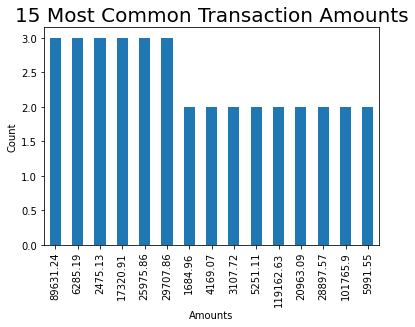

In [34]:
transaction_data['Amount'].value_counts().head(15).plot.bar()

In [31]:
fraudulent_data = transaction_data.loc[transaction_data['Fraudulent'] == 1].copy()
pie_chart_from_value_counts(fraudulent_data, 'Type', 'Fraudulent Data Distribution')

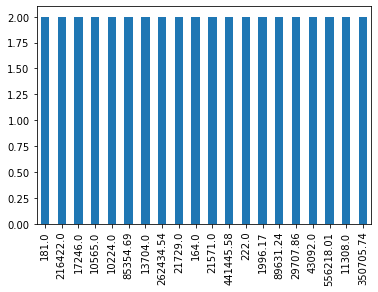

In [36]:
fraudulent_data['Amount'].value_counts().head(20).plot.bar()

In [32]:
non_fraudulent_data = transaction_data.loc[transaction_data['Fraudulent'] == 0].copy()
pie_chart_from_value_counts(non_fraudulent_data, 'Type', 'Non Fraudulent Data Distribution')

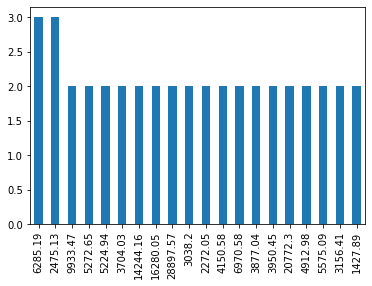

In [37]:
non_fraudulent_data['Amount'].value_counts().head(20).plot.bar()